In [1]:

import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score



In [4]:
data=pd.read_csv(r"C:\Users\NHSB\Downloads\car-mpg.csv")
data

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [5]:
data=data.drop(['car_name'],axis=1)
data['origin']=data['origin'].replace({1:'america',2:'europe',3:'asia'})
data=pd.get_dummies(data,columns=['origin'],dtype=int)
data=data.replace('?',np.nan)

In [6]:
data=data.apply(pd.to_numeric,errors='ignore')
numeric_cols=data.select_dtypes(include=[np.number]).columns
data[numeric_cols]=data[numeric_cols].apply(lambda x:x.fillna(x.median()))

C:\Users\NHSB\AppData\Local\Temp/ipykernel_7988/3959228371.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data=data.apply(pd.to_numeric,errors='ignore')


In [7]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


In [8]:
x=data.drop(['mpg'],axis=1)
y=data[['mpg']]

In [9]:
X_s=preprocessing.scale(x)
X_s=pd.DataFrame(X_s,columns=x.columns)

y_s=preprocessing.scale(y)
y_s=pd.DataFrame(y_s,columns=y.columns)


In [10]:
X_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.497643,-0.461968
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.941412,-1.292726,-0.497643,2.164651
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.497643,-0.461968
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.497643,-0.461968


In [11]:
X_train, X_test, y_train,y_test = train_test_split(X_s, y_s, test_size = 0.30, random_state = 1)
X_train.shape

(278, 10)

In [12]:
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name,regression_model.coef_[0][idx]))
intercept=regression_model.intercept_[0]    
print('The intercept is {}'.format(intercept))
    

The coefficient for cyl is 0.32102238569161057
The coefficient for disp is 0.324834309184838
The coefficient for hp is -0.22916950059437718
The coefficient for wt is -0.7112101905072288
The coefficient for acc is 0.014713682764190883
The coefficient for yr is 0.3755811949510743
The coefficient for car_type is 0.3814769484233099
The coefficient for origin_america is -0.07472247547584182
The coefficient for origin_asia is 0.044515252035678216
The coefficient for origin_europe is 0.04834854953945382
The intercept is 0.0192841161036397


In [13]:
ridge_model = Ridge(alpha = 0.3)##alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

ridge_model.fit(X_train, y_train)

print('Ridge model coef: {}'.format(ridge_model.coef_))

Ridge model coef: [[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
   0.37725608 -0.07423624  0.04441039  0.04784031]]


In [14]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

print('Lasso model coef: {}'.format(lasso_model.coef_))

Lasso model coef: [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


In [15]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

print('*************************')
#Ridge
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

print('*************************')
#Lasso
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.8343770256960538
0.8513421387780067
*************************
0.8343617931312616
0.8518882171608508
*************************
0.7938010766228453
0.8375229615977083


In [16]:
data_train_test = pd.concat([X_train, y_train], axis =1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [17]:
import statsmodels.formula.api as smf
ols1 = smf.ols(formula = 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data = data_train_test).fit()
ols1.params

Intercept         0.019284
cyl               0.321022
disp              0.324834
hp               -0.229170
wt               -0.711210
acc               0.014714
yr                0.375581
car_type          0.381477
origin_america   -0.074722
origin_europe     0.048349
origin_asia       0.044515
dtype: float64

In [18]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 15 Jul 2025   Prob (F-statistic):           3.12e-99
Time:                        15:14:34   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

In [19]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(X_test)-y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.3776693425408783


<Axes: xlabel='acc', ylabel='mpg'>

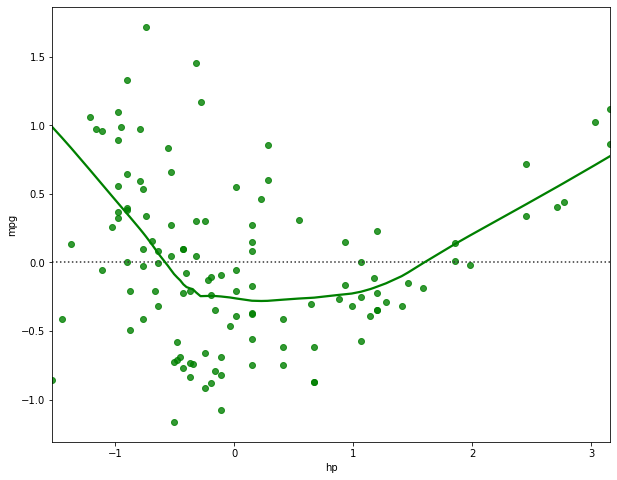

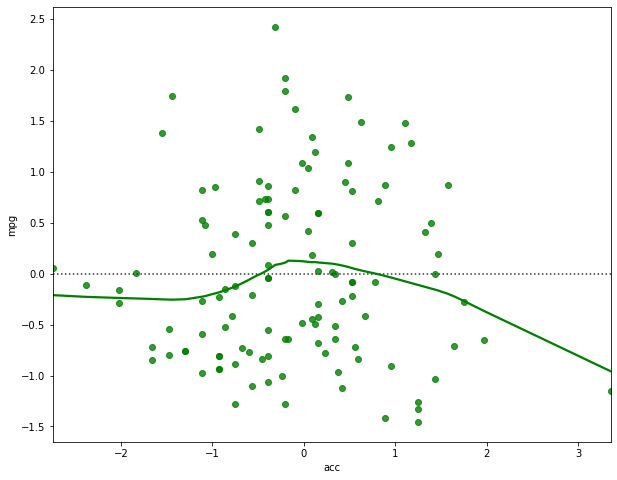

In [20]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['acc'], y= y_test['mpg'], color='green', lowess=True )

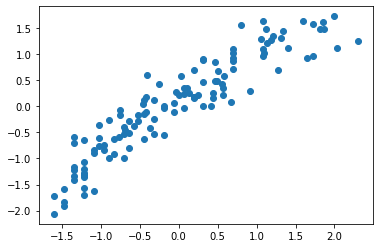

In [21]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['mpg'], y_pred)